Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [12]:
NAME = "Gasper Bizjan"

---

## Assignment 8 - local P1-Basis Class

This assignment is about the local P1-Basis on the reference triangle given by the degrees of freedom $(\hat{x}_0,\hat{y}_0)=(0,0)$ , $(\hat{x}_1,\hat{y}_1)=(1,0)$ and $(\hat{x}_2,\hat{y}_2)=(0,1)$. The local basis functions $\hat{\phi}_i$ should be linear and fullfil the lagrangian condition 

$$
\hat{\phi}_i (\hat{x}_j,\hat{y}_j) = \delta_{ij}
$$
as in the lecture $7$. 

### 8.1 The Basis Object

Write a python class ```Basis``` which represents the linear local basis on the reference triangle. The constructor has no input. <br><b>All the further functions have to be defined inside of the class.</b> 

#### 8.1.1 evalPhi

Write a property ```evalPhi``` which is the evaluation of the three basis functions $\hat{\phi}_i$ on a set of points in the reference Element. <br>
<b>INPUT</b>: ```xHat```, set of $N_p$ points in the reference element as ```np.array([ [x1,y1] , [x2 , y2] , ... ])``` of shape $N_p \times 2$.   <br>
<b>OUTPUT</b>: ```np.ndarray``` of shape $N_p \times 3$

Hints:<br> 
$(\hat{x}_j , \hat{y}_j) = $ ```xHat[j,:]```<br>
$\hat{\phi}_i(\hat{x}_j,\hat{y}_j) = $ ``` evalPhi(xHat)[j,i] ```

#### 8.1.2 evalGradPhi
Write a property ```evalGradPhi``` which is the evaluation of the gradient of the three basis function $\nabla\hat{\phi}_i$ on a set of points. <br>
<b>INPUT</b>: ```xHat```, set of $N_p$ points in the reference element as ```np.array([ [x1,y1] , [x2 , y2] , ... ])``` of shape $N_p \times 2$.   <br>
<b>OUTPUT</b>: ```np.ndarray``` of shape $N_p \times 3 \times 2$
<br><br>

Hints:<br> 
$(\hat{x}_j , \hat{y}_j) = $ ```xHat[j,:]```<br>
$\partial_k\hat{\phi}_i(\hat{x}_j,\hat{y}_j) = $ ``` evalGradPhi(xHat)[j,i,k] ``` 


#### 8.1.3 Visualizing 
Add a property ```show``` that visulizes the local basis $\hat{\phi} = \sum_{i=0}^2 \hat{u}_i\hat{\phi}_i$ with respect to a local Dof-Vector $\hat{u}$. <br>
<b>INPUT</b>: ```uHat```, local Dof-Vector $\hat{u}$ as ```np.array([ u0,u1,u2 ])```.   <br>



In [14]:
# YOUR CODE HERE
# YOUR CODE HERE
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["figure.figsize"] = [8, 8]

class Basis():
    def __init__(self):
        self.PhiHat = np.array([], dtype=np.int64)
        self.GradPhiHat = np.array([], dtype=np.int64)
    
    def evalPhi(self, xHat):
        for j in range(len(xHat)):
            PhiHat0 = 1-xHat[j,0]-xHat[j,1]
            PhiHat1 = xHat[j,0]
            PhiHat2 = xHat[j,1]
            self.PhiHat = np.append(self.PhiHat, np.array([PhiHat0, PhiHat1, PhiHat2]), axis=0)
        self.PhiHat = np.reshape(self.PhiHat, (len(xHat),3))
        return self.PhiHat
        
    def evalGradPhi(self, xHat):
        self.GradPhiHat = np.array([
            [[-1,-1],[1,0],[0,1]],
            [[-1,-1],[1,0],[0,1]],
            [[-1,-1],[1,0],[0,1]]])
        return self.GradPhiHat
    
    def show(self, uHat):
        plt.rcParams["figure.figsize"] = [5, 5]
        x = np.linspace(0, 1)
        y = np.linspace(0, 1)
        x, y = np.meshgrid(x, y)
        z = (1-x-y)*uHat[0] + x*uHat[1] + y*uHat[2]
        fig = plt.figure()
        ax = Axes3D(fig)
        ax.plot_surface(x, y, z, cmap=plt.cm.coolwarm)
        ax.set_xlabel(r'$\hat x$')
        ax.set_ylabel(r'$\hat y$')
        ax.set_zlabel(r'$\hat\Phi(\hatx,\haty)$')
        plt.show()

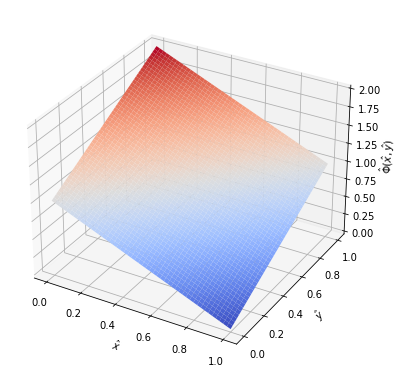

In [15]:
b = Basis()
b.show(np.array([1,0,2]))